In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
data = pd.read_csv('troop_movements.csv')
print(data.head())

In [ ]:
empire_chars = data[data['empire_or_resistance'] == 'empire']
print(empire_chars.head())

In [ ]:
resistance_chars = data[data['empire_or_resistance'] == 'resistance']
print(resistance_chars.head())

In [ ]:
empire_count = np.sum(data['empire_or_resistance'] == 'empire')
resistance_count = np.sum(data['empire_or_resistance'] == 'resistance')
print("empire count:", empire_count)
print("resistance count:", resistance_count)

In [ ]:
hw_location, counts = np.unique(data['homeworld'], return_counts=True)
for hw, count in zip(hw_location, counts):
    print(hw, ':', count)

In [ ]:
u_type, counts = np.unique(data['unit_type'], return_counts=True)
for unit, count in zip(u_type, counts):
    print(unit, ':', count)

In [ ]:
data['is_resistance'] = np.where(data['empire_or_resistance'] == 'resistance', True, False)
print(data.head())

In [ ]:
! pip install seaborn

In [ ]:
! pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('troop_movements.csv')

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['empire_or_resistance'], kde=False, bins=20, color='red')
plt.title('Character count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [ ]:
! pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
# get the model we want to work with
from sklearn.tree import DecisionTreeClassifier
# get tools to check model performance
from sklearn.metrics import accuracy_score
# more on this later
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Define features (X) and target variable (y)
X = data[['homeworld', 'unit_type']]
y = data['empire_or_resistance']

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
"""
# Define categorical features for one-hot encoding
categorical_features = ['homeworld', 'unit_type']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

y_feature = ['empire_or_resistance']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), y_feature)
    ],
    remainder='passthrough'
)
"""

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

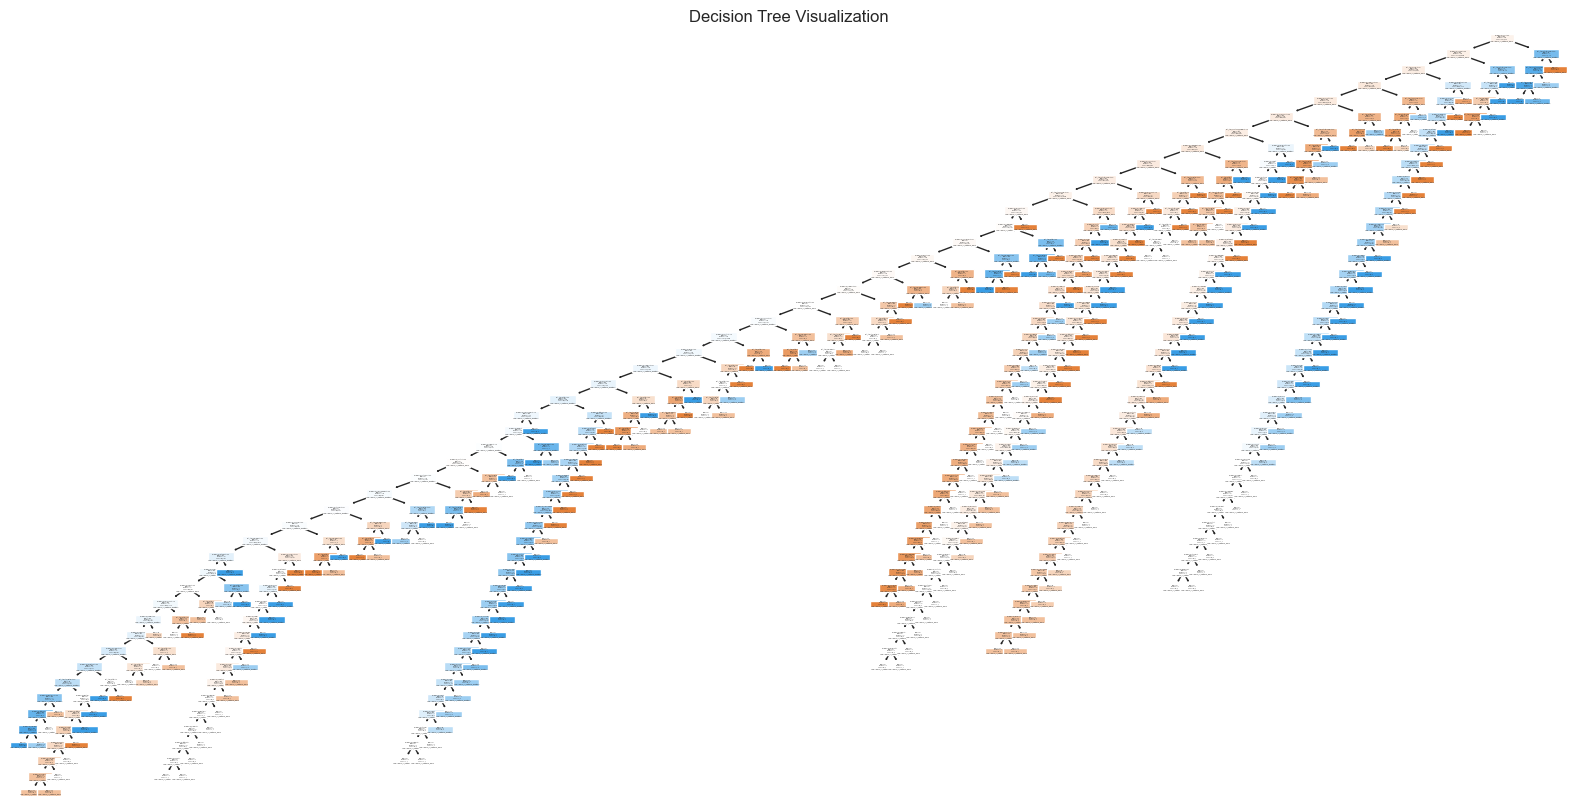

In [147]:
# plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names= X_encoded.columns, class_names=['empire_or_resistance_empire','empire_or_resistance_resistance'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [148]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})


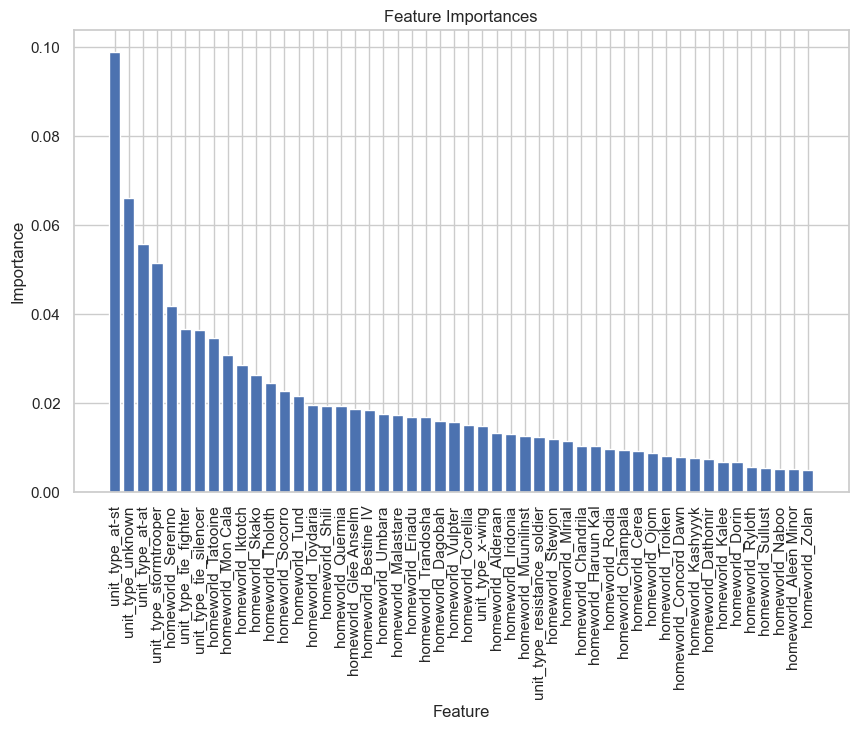

In [161]:
# Sort the feature importances by Importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Set up the subplot
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1)

# Plot the bar chart
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')

plt.show()

In [163]:
import pickle
with open("trained_model.pkl",'wb') as f :  
    pickle.dump(clf,f)